# -*- coding: utf-8 -*-
"""
Created on Tues Oct 20 19:18:00 2020

@author: AMAN VERMA
"""

In [39]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(5,5))

# ---------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# ----------------------------------------------
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score


<Figure size 360x360 with 0 Axes>

# Loading the data into a dataframe


In [3]:
data = pd.read_csv("/content/drive/My Drive/CANCER/data.csv")
data.shape

(569, 33)

In [4]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data Preprocessing

In [5]:
del data['Unnamed: 32']
del data['id']

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  radius_se                569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  area_se                  569 non-null    float64
 13  compactness_se           569 non-null    float64
 14  concavity_se             5

In [ ]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 Encoding categorial features


In [6]:
encode = LabelEncoder()
data['diagnosis'] = encode.fit_transform(data['diagnosis'])

In [7]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 Correlation map

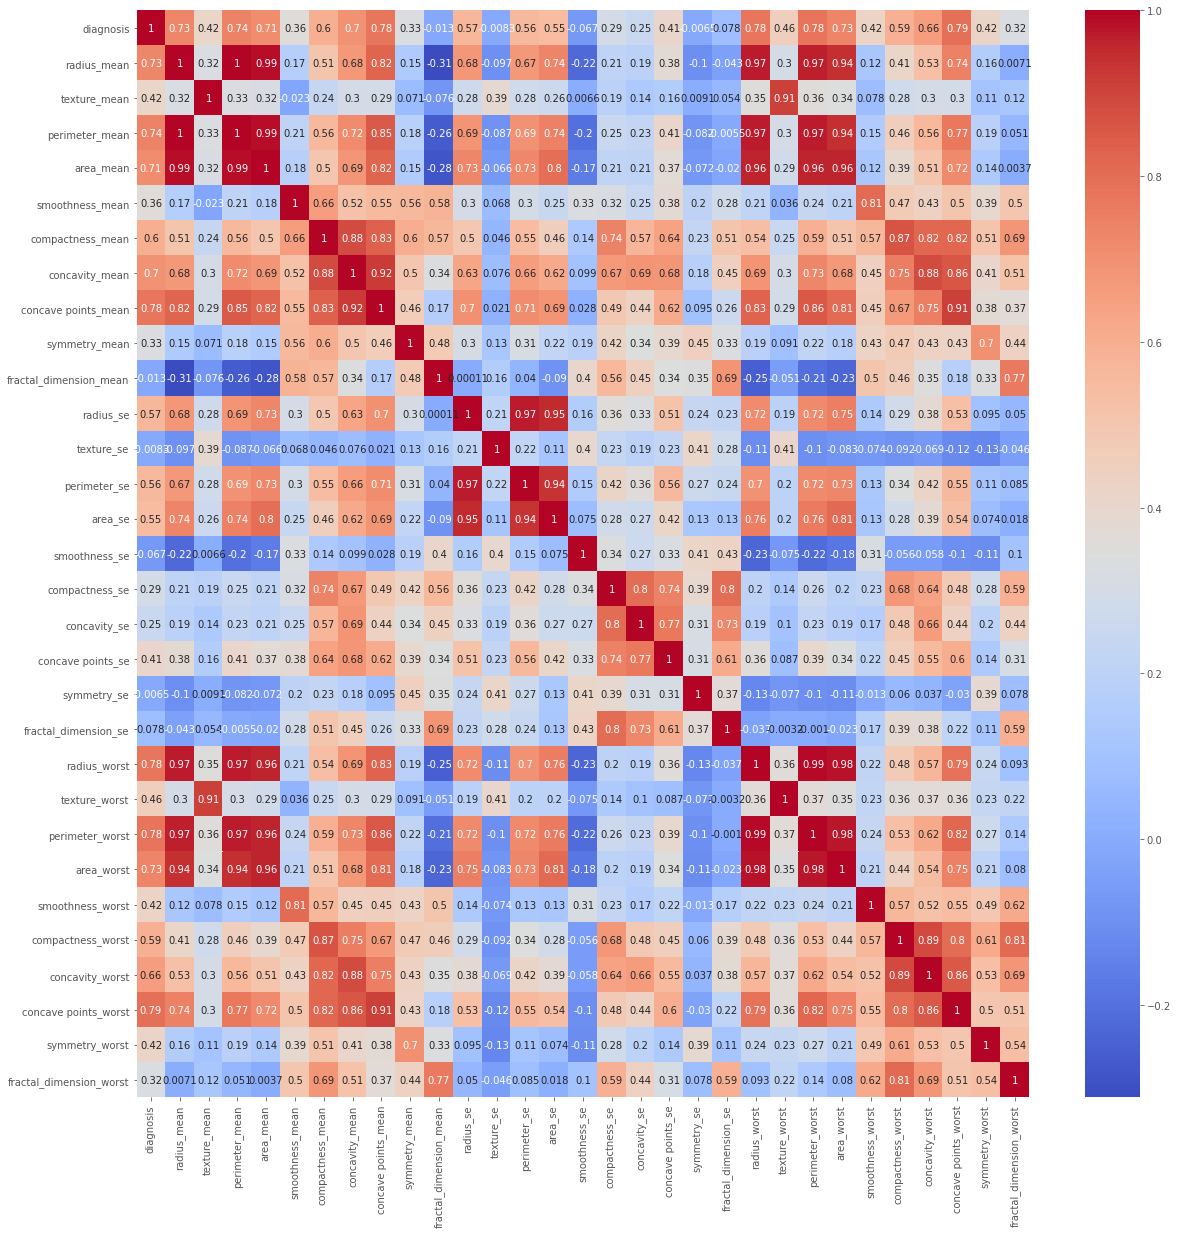

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Remove feature having correlation less than 20%


In [9]:
less_corr = data.corr().diagnosis[data.corr().diagnosis<=0.2].index
data = data.drop(less_corr,axis=1)
print(data.shape)
data.head(5)

(569, 26)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,8.589,153.40,0.04904,0.05373,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,3.398,74.08,0.01308,0.01860,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,4.585,94.03,0.04006,0.03832,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,3.445,27.23,0.07458,0.05661,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,5.438,94.44,0.02461,0.05688,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Train - Test Split

In [10]:
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Scaling Data

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
accuracy=[]
model=[]

### LINEAR SVM MODEL

Accuracy using Linear SVM Kernal is: 0.9736842105263158


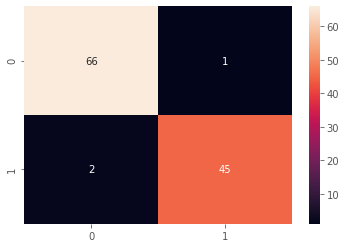

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [31]:
classifier = SVC(kernel='linear', random_state=(0))
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Accuracy using Linear SVM Kernal is:",accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()
accuracy.append(accuracy_score(y_test,y_pred))
model.append("LINEAR SVM")
print(classification_report(y_test,y_pred))


### POLYNOMIAL SVM

Accuracy using Polynomial SVM Kernal is: 0.9035087719298246


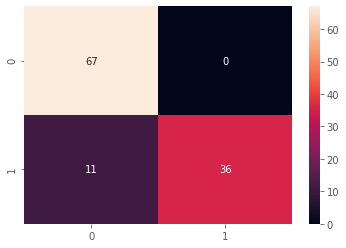

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        67
           1       1.00      0.77      0.87        47

    accuracy                           0.90       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.90      0.90       114



In [32]:
classifier = SVC(kernel='poly', random_state=(0))
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
#Model Evaluation
print("Accuracy using Polynomial SVM Kernal is:",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()
accuracy.append(accuracy_score(y_test,y_pred))
model.append("POLYNOMIAL SVM")
print(classification_report(y_test,y_pred))

### GAUSSIAN SVM

Accuracy using Gaussian SVM Kernal is: 0.9649122807017544


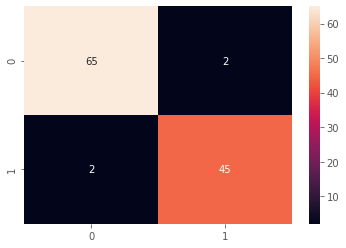

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [33]:
classifier = SVC(kernel='rbf', random_state=(0))
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
#Model Evaluation
print("Accuracy using Gaussian SVM Kernal is:",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()
accuracy.append(accuracy_score(y_test,y_pred))
model.append("GAUSSIAN SVM")
print(classification_report(y_test,y_pred))


### LOGISTIC REGRESSION

Accuracy using Logistic Regression is: 0.9736842105263158


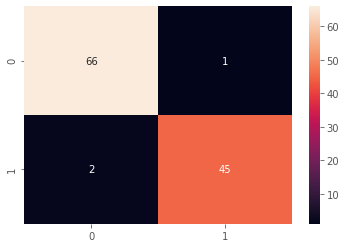

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [34]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train,y_train)
pred_log_reg=logreg.predict(X_test)
#Model Evaluation
print("Accuracy using Logistic Regression is:",accuracy_score(y_test, pred_log_reg))
cm = confusion_matrix(y_test, pred_log_reg)
sns.heatmap(cm, annot=True)
plt.show()
accuracy.append(accuracy_score(y_test,pred_log_reg))
model.append("LOGISTIC REGRESSION")
print(classification_report(y_test,y_pred))


### DECISION TREE

25
Accuracy with 1 Max_features is : 92.10526315789474
Accuracy with 2 Max_features is : 88.59649122807018
Accuracy with 3 Max_features is : 92.98245614035088
Accuracy with 4 Max_features is : 95.6140350877193
Accuracy with 5 Max_features is : 93.85964912280701
Accuracy with 6 Max_features is : 95.6140350877193
Accuracy with 7 Max_features is : 95.6140350877193
Accuracy with 8 Max_features is : 97.36842105263158
Accuracy with 9 Max_features is : 95.6140350877193
Accuracy with 10 Max_features is : 97.36842105263158
Accuracy with 11 Max_features is : 94.73684210526315
Accuracy with 12 Max_features is : 93.85964912280701
Accuracy with 13 Max_features is : 93.85964912280701
Accuracy with 14 Max_features is : 92.10526315789474
Accuracy with 15 Max_features is : 90.35087719298247
Accuracy with 16 Max_features is : 94.73684210526315
Accuracy with 17 Max_features is : 98.24561403508771
Accuracy with 18 Max_features is : 96.49122807017544
Accuracy with 19 Max_features is : 91.22807017543859
Acc

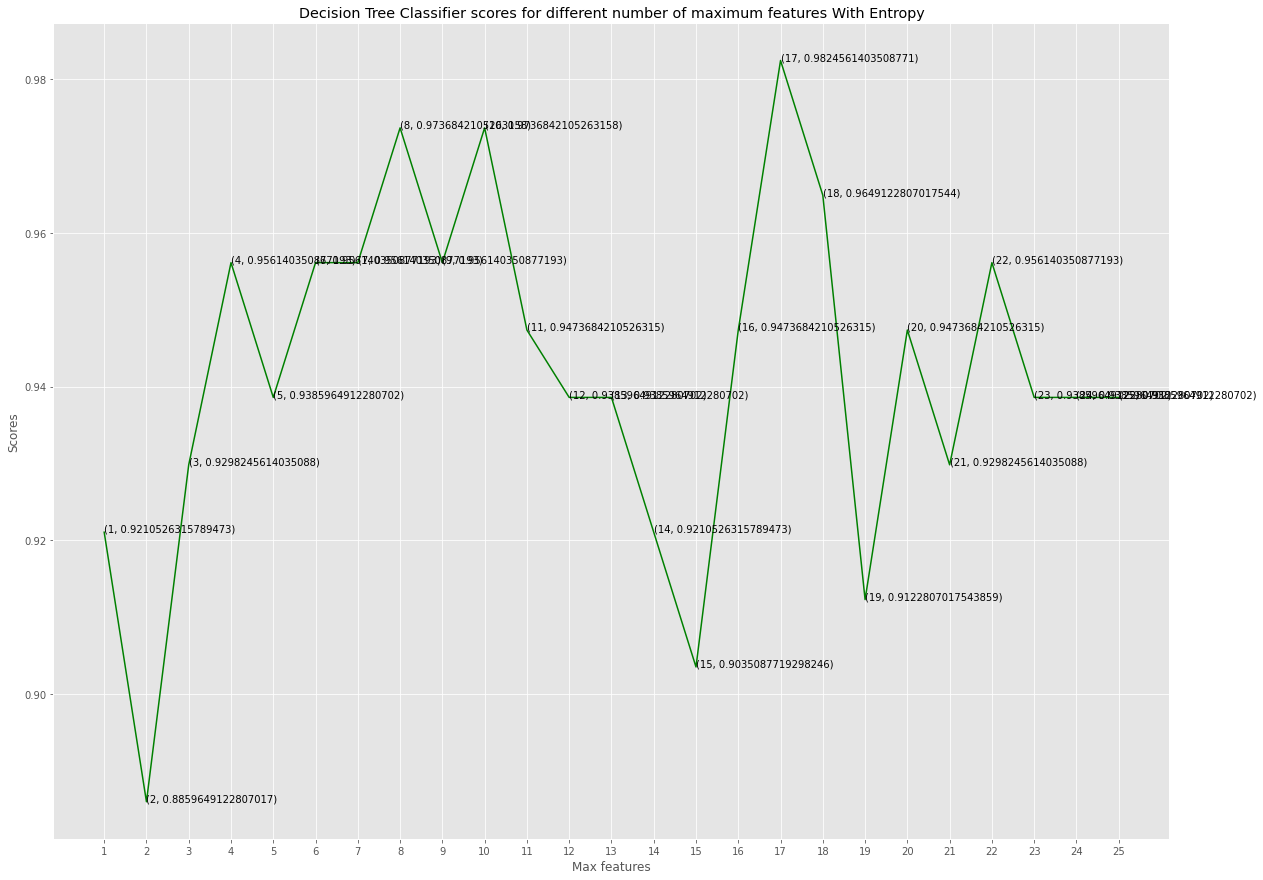

In [35]:
dtsc = []
print(len(X.columns))
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0,criterion='entropy')
    dt_classifier.fit(X_train,y_train)
    dt_pred=dt_classifier.predict(X_test)
    dtsc.append(accuracy_score(y_test, dt_pred))
    print("Accuracy with",i,"Max_features is :", accuracy_score(y_test, dt_pred)*100)
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, len(X.columns) + 1)], dtsc, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dtsc[i-1], (i, dtsc[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features With Entropy')
s=max(dtsc)
accuracy.append(s)
model.append("DECISION TREE (Ent)")
print(classification_report(y_test,y_pred))



25
Accuracy with 1 Max_features is : 92.10526315789474
Accuracy with 2 Max_features is : 92.98245614035088
Accuracy with 3 Max_features is : 92.10526315789474
Accuracy with 4 Max_features is : 94.73684210526315
Accuracy with 5 Max_features is : 94.73684210526315
Accuracy with 6 Max_features is : 97.36842105263158
Accuracy with 7 Max_features is : 93.85964912280701
Accuracy with 8 Max_features is : 95.6140350877193
Accuracy with 9 Max_features is : 93.85964912280701
Accuracy with 10 Max_features is : 92.98245614035088
Accuracy with 11 Max_features is : 96.49122807017544
Accuracy with 12 Max_features is : 93.85964912280701
Accuracy with 13 Max_features is : 91.22807017543859
Accuracy with 14 Max_features is : 92.10526315789474
Accuracy with 15 Max_features is : 92.10526315789474
Accuracy with 16 Max_features is : 92.10526315789474
Accuracy with 17 Max_features is : 94.73684210526315
Accuracy with 18 Max_features is : 94.73684210526315
Accuracy with 19 Max_features is : 94.73684210526315


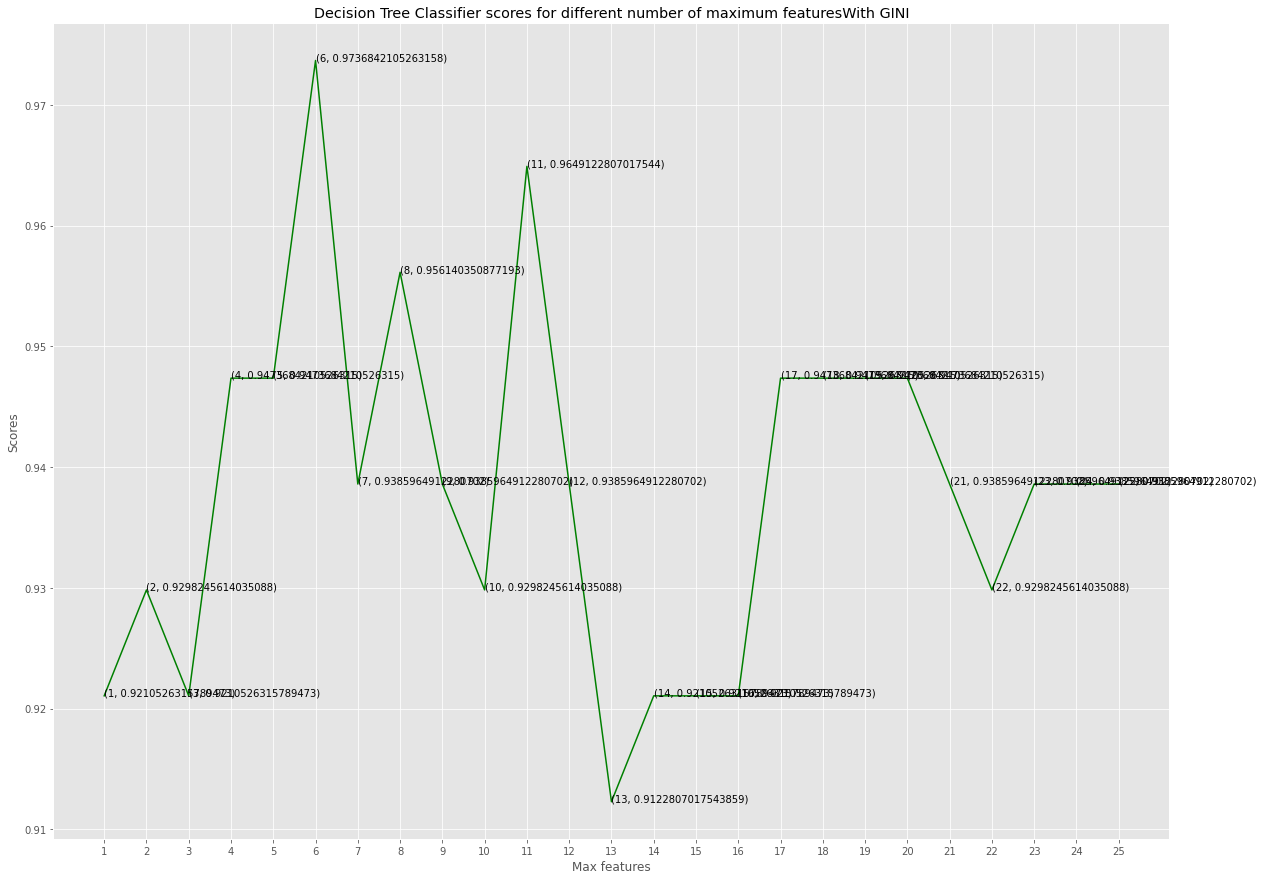

In [49]:
dtsc = []
print(len(X.columns))
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0,criterion='gini')
    dt_classifier.fit(X_train,y_train)
    dt_pred=dt_classifier.predict(X_test)
    dtsc.append(accuracy_score(y_test, dt_pred))
    print("Accuracy with",i,"Max_features is :", accuracy_score(y_test, dt_pred)*100)
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, len(X.columns) + 1)], dtsc, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dtsc[i-1], (i, dtsc[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum featuresWith GINI')
s=max(dtsc)
accuracy.append(s)
model.append("DECISION TREE (Gini)")
print(classification_report(y_test,y_pred))


### RANDOM FOREST

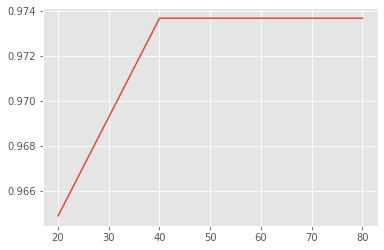

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [37]:
R_f=[]
n_esti=[20,40,60,80]
for i in n_esti:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train,y_train)
    pred_rf=rf_classifier.predict(X_test)
    R_f.append(accuracy_score(y_test, pred_rf))

plt.plot(n_esti,R_f)
plt.show()
s=max(R_f)
accuracy.append(s)
model.append("RANDOM FOREST")
print(classification_report(y_test,y_pred))


### COMPRATIVE STUDY

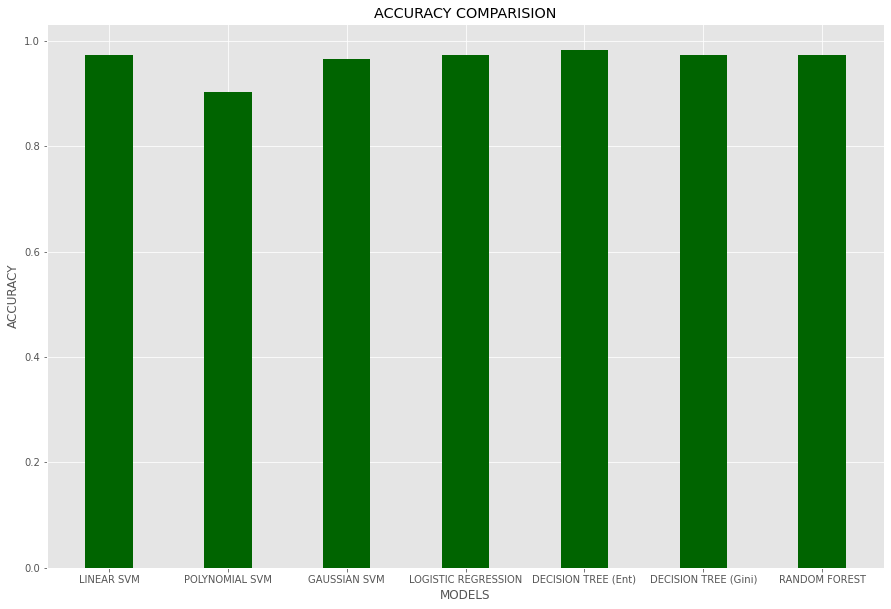

In [47]:
figure = plt.figure(figsize=(15, 10))
plt.bar(model, accuracy, color ='darkgreen', width = 0.4) 
plt.xlabel("MODELS") 
plt.ylabel("ACCURACY") 
plt.title("ACCURACY COMPARISION") 
plt.show() 